## Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import read
import pandas as pd
import math

def checkNotEmpty(input_array):
    for x in input_array:
        if float(x) > 0:
            return True
    return False

def getAverage(input_array):
    acc = 0.0
    for x in input_array:
        acc+=x
    return acc / len(input_array)

def getWindowFrameFromDir(source_dir, window_size):
    cache_windows = []
    ipc_windows = []
    for subdir, dirs, files in os.walk(source_dir):
        for dir in dirs:
            cache = []
            ipc = []
            ipc_window = []
            cache_window= []
            for filename in os.listdir(os.path.join(subdir, dir)):
                f = os.path.join(subdir, dir, filename)
                actualfile = open(f,'r')
                if (filename[:3] == "ipc"):
                    ipc = actualfile.readlines()
                else:
                    cache = actualfile.readlines()
            dipc = window_size-len(ipc)
            dcache = window_size-len(cache)
            if dipc > 0:
                for x in range(dipc):
                    ipc.append('0')
            if dcache > 0:
                for x in range(dcache):
                    cache.append('0')
            if (checkNotEmpty(cache) and checkNotEmpty(ipc)):
                for x in range(0, window_size):
                    ipc_window.append(float(ipc[x]))
                for x in range(0, window_size):
                    # let's normalize cache access to IPC
                    cache_window.append(float(cache[x])/1000000)
                cache_windows.append(getAverage(cache_window))
                ipc_windows.append(getAverage(ipc_window))
    dataframe = pd.DataFrame(list(zip(ipc_windows, cache_windows)), columns=['avg_ipc', 'avg_cache'])
    return dataframe


## Data frame construction

In [89]:
bench = "../results/benchmarks/" # change me if necessary
normal = "../results/custom_normal"
attack = "../results/custom_attack/"
window_size = 50 # change me if necessary

In [87]:
df_bench  = getWindowFrameFromDir(bench,window_size)
df_normal = getWindowFrameFromDir(normal,window_size)
df_bench


,avg_ipc,avg_cache
0,1.261,1.634147
1,1.790,1.002941
2,2.267,9.183417
3,0.644,4.697004
4,1.033,2.126906
...,...,...
1775,1.023,2.975180
1776,0.610,6.817950
1777,0.709,2.069494
1778,1.175,2.872858


<AxesSubplot: xlabel='avg_ipc', ylabel='Probability'>

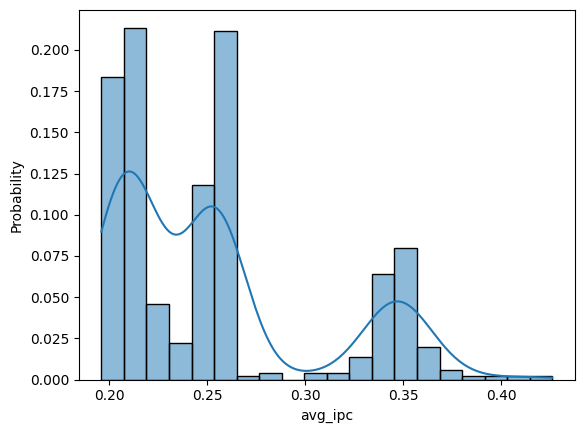

In [88]:
df_attack = getWindowFrameFromDir(attack,window_size)
import seaborn as sns
sns.histplot(df_normal['avg_ipc'], kde=True, stat='probability')

In [20]:
merged_df = pd.concat([df_normal, df_bench[:527]], ignore_index=True)
merged_df

,avg_ipc,avg_cache
0,0.5588,0.334839
1,0.6014,0.262206
2,0.5930,0.249684
3,0.5950,0.252701
4,0.4730,0.310113
...,...,...
1050,0.1862,0.640915
1051,0.1750,1.108233
1052,0.1622,0.588146
1053,0.2222,1.003168


## Unsupervised stuff

### Categories visualization

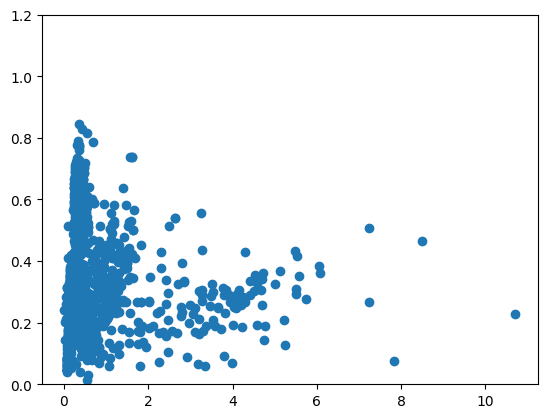

In [21]:
y_axis = merged_df["avg_ipc"]  
x_axis = merged_df["avg_cache"]  

# Plotting
plt.scatter(x_axis, y_axis)
plt.ylim(0,1.2)
plt.show()

### K-means (2)

In [25]:
from sklearn import datasets
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)

# Fitting Model
model.fit(merged_df)

# Predicting using the whole dataset
whole_prediction = model.predict(merged_df)
attack_prediction = model.predict(df_attack)
normal_prediction = model.predict(df_normal)
bench_prediction = model.predict(df_bench)


print(getAverage(attack_prediction))

0.0


/home/jef/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit(merged_df)
whole_prediction = model.predict(merged_df)
attack_prediction = model.predict(df_attack)
normal_prediction = model.predict(df_normal)
bench_prediction = model.predict(df_bench)


print(getAverage(attack_prediction))

AttributeError: 'TSNE' object has no attribute 'predict'